
notes
-------
Norin was very close to me and mom. Mom and I were pretty much in the same cluster. Bianca was close to mom. This is all sensible results given any intuition however, I didn't add any desi people in there so in a dataset full of caucasian women ofcourse we're the most similar. However, note: Norin and mom were far away from Monica and Bianca. Which made me think not only am I attracted to women that look like mom but does it also mean I'm attracted to women that look like me? 

* try making a set of a bunch of indian people and then some random shit



response from Leland
-----
Hi,

The label numbers are somewhat arbitrary. If, however, you want to know which cluster is closer to which you can look at the condensed tree plot and select clusters with a selection palette. That is, if clusterer is you hdbscan model that you've fit to data you can do

```
  import seaborn as sns
  clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))
 sns.palplot(sns.color_palette('deep', 8))
```
in a notebook and line up the colors of the cluster selection palette with the ordinal numbers of the clusters to see how clusters relate to each other. Clusters that are closer to each other within the tree are closer to each other.

If you are using t-SNE currently I would also suggest you could look at one of my current projects, umap: https://github.com/lmcinnes/umap . It does a better job of preserving global structure than t-SNE and has a *lot* more stability/consistency (up to rotation) between runs.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [39]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from tsne import multithread_map, rescaler
from image_helpers import *
from image_helpers import _square_sizer
from tsne import image_scatter_plot
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
data, paths, encodings, arrays_rescaled, X = load_encodings('CF_ALL_faces_encodings.pickle')
data_, paths_, encodings_, arrays_rescaled_, X_ = load_encodings('friends_and_myself_pics_faces_encodings.pickle')

In [49]:
arrays_rescaled.extend(arrays_rescaled_) , encodings.extend(encodings_), paths.extend(paths_)

(None, None, None)

In [50]:
X = np.concatenate((X, X_))
df = pd.DataFrame().from_csv(
        'tsne_trials/filename_to_rating_lookup_CF_ALL_faces_encoding.csv', 
        index_col=[0]
    ) 
    
dic = dict(zip(df['Filename'], df['Ratings']))
paths=[path.replace('_face', '') for path in paths]
colors_dic = [dic.get(path.split('/')[-1]) for path in paths]

In [51]:
num_of_friends=data_.shape[0]
len(encodings), len(paths), len(arrays_rescaled), X.shape[0], num_of_friends

(762, 762, 762, 762, 21)

In [52]:
colors_pal = sns.color_palette('deep', 5)

tsne_embeddings, xx, yy, lis = map_colors_to_ratings(colors_dic, encodings, colors_pal)

count    762.000000
mean       0.755333
std        0.069566
min        0.000000
25%        0.717874
50%        0.757237
75%        0.803431
max        0.938809
Name: dist_from_datapt, dtype: float64
skew --  -1.8820707218035662
kurtosis -- 17.5391301014335


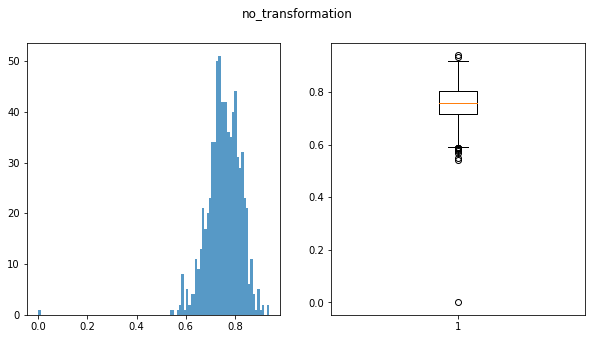

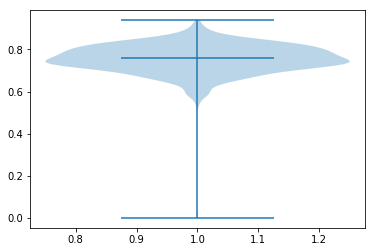

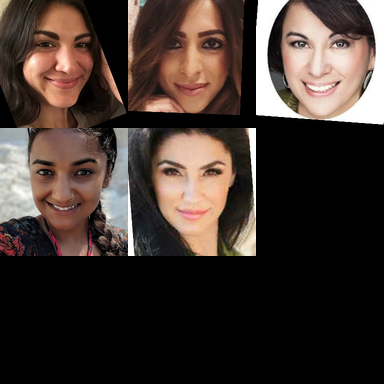

In [14]:
data_pt = pd.Series(encodings[-1])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.775172
std        0.086895
min        0.000000
25%        0.720752
50%        0.780201
75%        0.830272
max        0.986431
Name: dist_from_datapt, dtype: float64
skew --  -1.0178054022869378
kurtosis -- 7.59705943951197


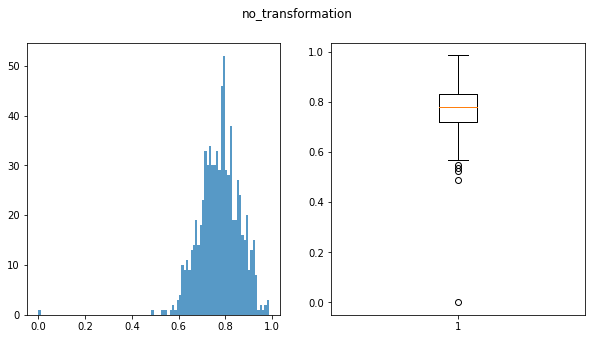

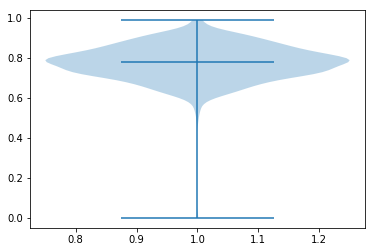

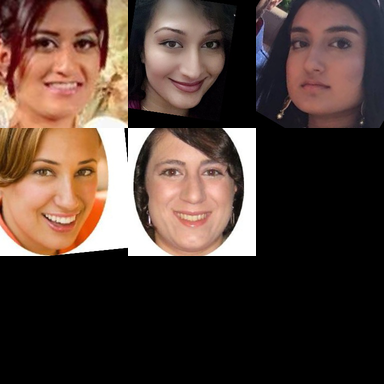

In [23]:
data_pt = pd.Series(encodings[-2])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.833899
std        0.095041
min        0.000000
25%        0.775153
50%        0.836770
75%        0.896012
max        1.081250
Name: dist_from_datapt, dtype: float64
skew --  -1.0075601721001943
kurtosis -- 7.249464574157015


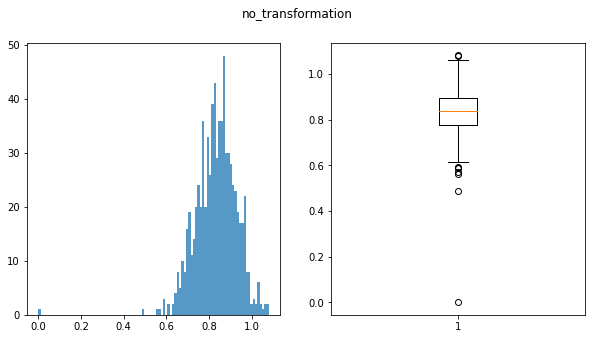

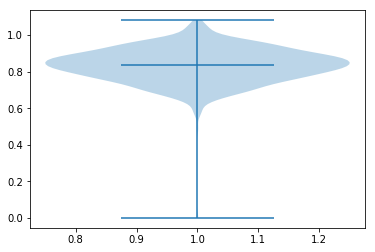

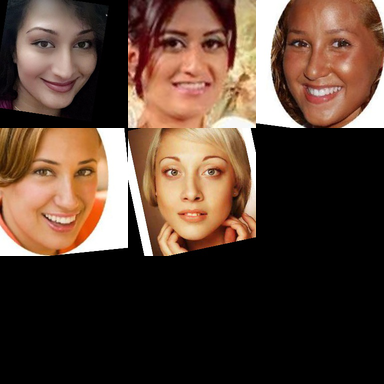

In [24]:
data_pt = pd.Series(encodings[-3])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.772300
std        0.075550
min        0.000000
25%        0.725400
50%        0.776500
75%        0.823597
max        0.973742
Name: dist_from_datapt, dtype: float64
skew --  -1.5795239763242401
kurtosis -- 13.547819968249541


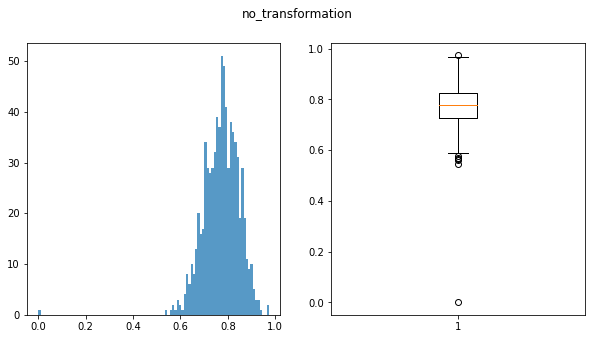

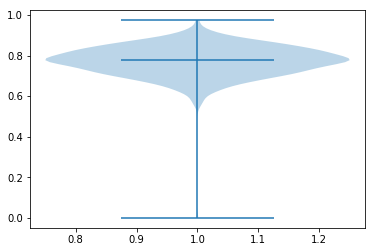

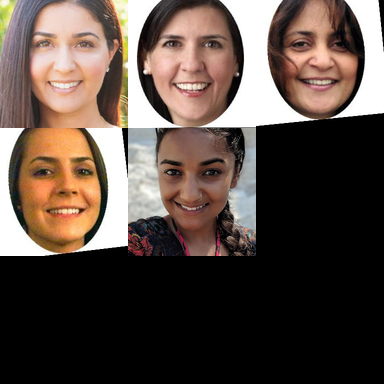

In [25]:
data_pt = pd.Series(encodings[-4])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.841674
std        0.080255
min        0.000000
25%        0.798613
50%        0.850192
75%        0.895467
max        1.040038
Name: dist_from_datapt, dtype: float64
skew --  -1.856052093894815
kurtosis -- 15.38874033532851


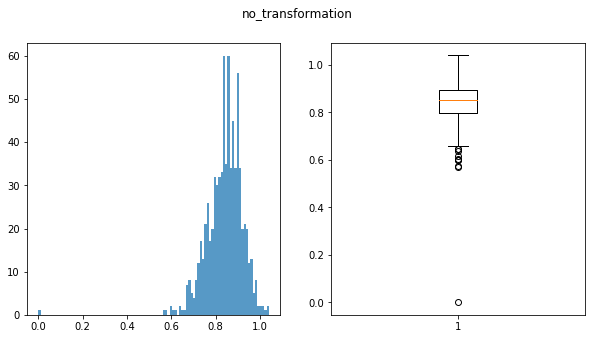

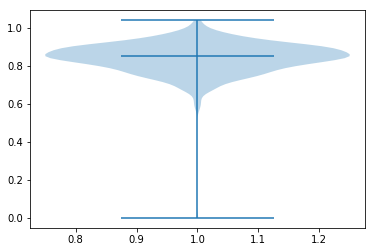

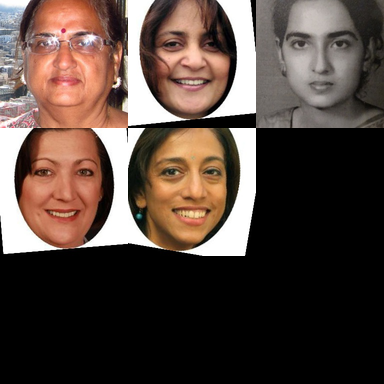

In [27]:
data_pt = pd.Series(encodings[-5])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.824529
std        0.075666
min        0.000000
25%        0.782560
50%        0.831389
75%        0.872546
max        1.000232
Name: dist_from_datapt, dtype: float64
skew --  -2.141763535815265
kurtosis -- 18.831524793119737


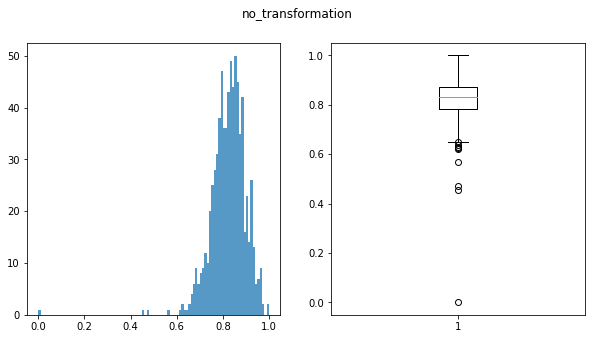

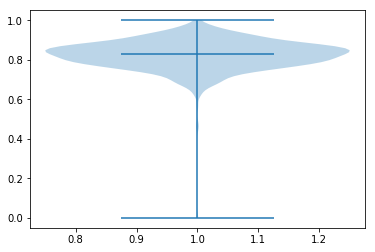

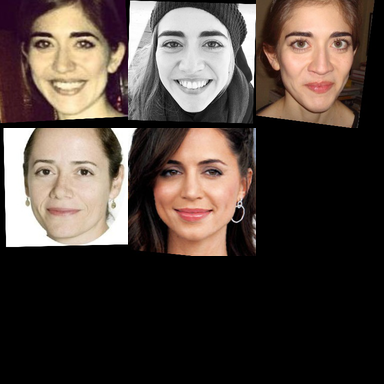

In [28]:
data_pt = pd.Series(encodings[-10])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.785424
std        0.075924
min        0.000000
25%        0.741790
50%        0.788081
75%        0.836476
max        1.013826
Name: dist_from_datapt, dtype: float64
skew --  -1.5635707572495938
kurtosis -- 14.329815516667473


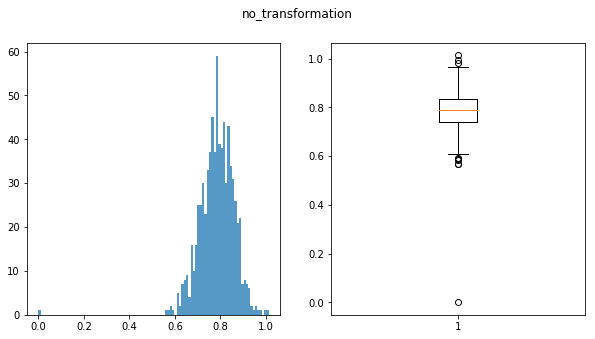

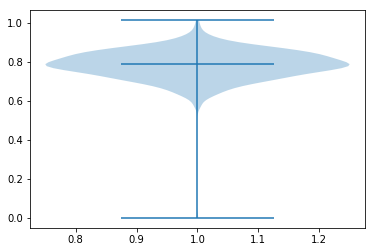

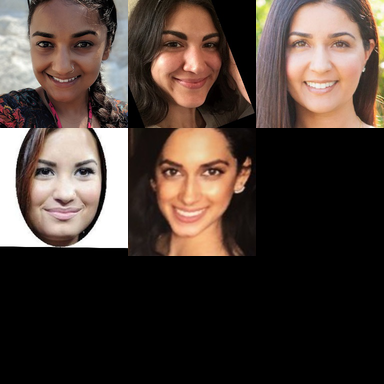

In [29]:
data_pt = pd.Series(encodings[-15])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.919379
std        0.066777
min        0.000000
25%        0.885654
50%        0.920818
75%        0.960532
max        1.094107
Name: dist_from_datapt, dtype: float64
skew --  -3.5707327104265216
kurtosis -- 46.058688159416675


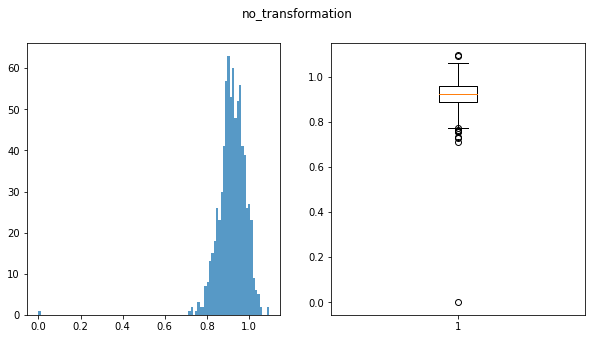

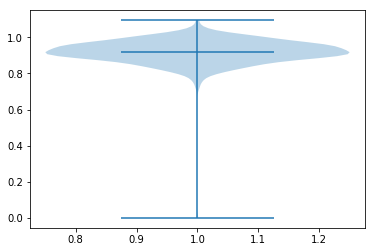

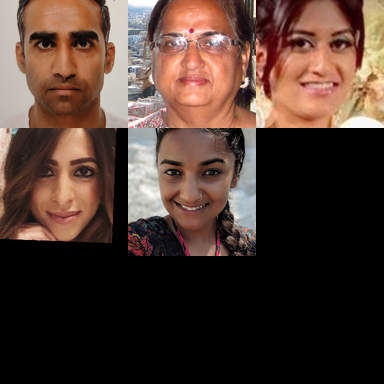

In [30]:
data_pt = pd.Series(encodings[-20])
find_the_closest_pts(encodings,arrays_rescaled, data_pt)

count    762.000000
mean       0.808941
std        0.075722
min        0.000000
25%        0.765537
50%        0.815678
75%        0.855852
max        1.013361
Name: dist_from_datapt, dtype: float64
skew --  -1.8511810542032499
kurtosis -- 16.52775655887429


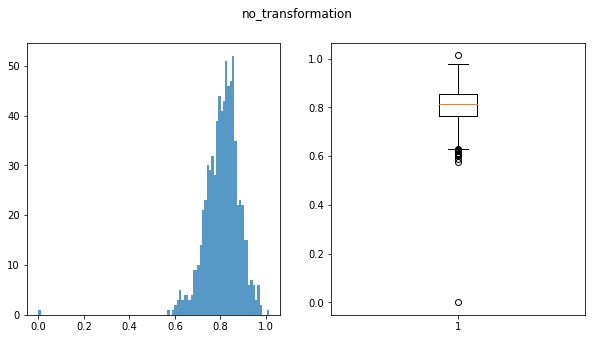

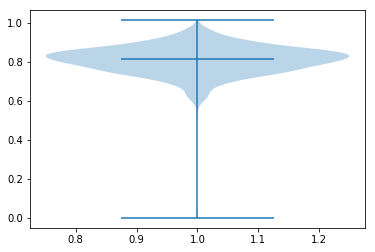

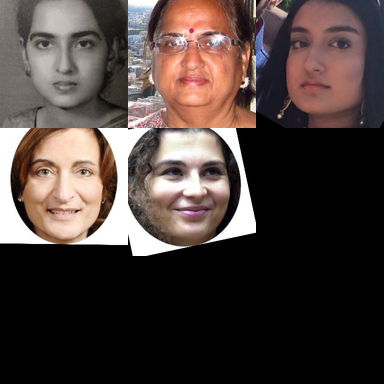

In [37]:
data_pt = pd.Series(encodings[-21])
find_the_closest_pts(encodings,arrays_rescaled, data_pt, top_x=5)

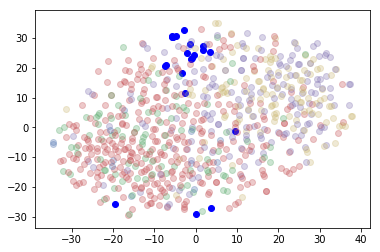

In [53]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    plt.scatter(x, y, color=c, alpha=0.3)

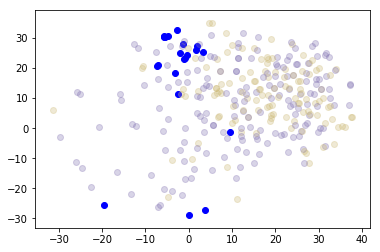

In [54]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    if  c in {colors_pal[3], colors_pal[4]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

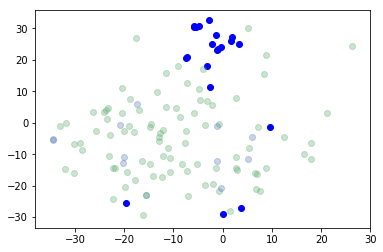

In [55]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 

    if  c in {colors_pal[1], colors_pal[0]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

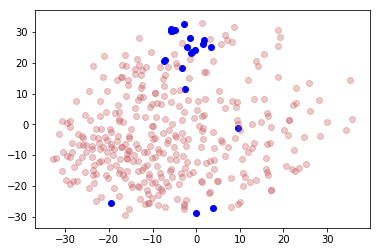

In [56]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    if  c in {colors_pal[2]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

In [19]:
for _ in range(1,6):
    tsne_embeddings, _, _, _ = map_colors_to_ratings(colors_dic, encodings, colors_pal)
    plot_data = image_scatter_plot(
                    tsne_scatter_plot=tsne_embeddings, 
                    images=X, 
                    res=5000
                )

    print(plot_data.shape)
    im = Image.fromarray(np.uint8(plot_data))
    im.show()


(6070, 5128, 3)
(5287, 5128, 3)
(5128, 5177, 3)
(5128, 5337, 3)
(5776, 5128, 3)


In [20]:
#set min_cluster_size 5 to get monica grouped with bianca
params = {
    'min_cluster_size': 2,
    'allow_single_cluster':False,
    'min_samples':1,
    }

clt = hdbscan.HDBSCAN(**params)
clt.fit(encodings)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=2, min_samples=1, p=None,
    prediction_data=False)

## Adding friends,

Adding my sister and that random kid showed interesting and sensible results: 
- The kids face was clustered with the one person that closest resembled a child which begs the question: __Can an AI algo easily guess age?__ Perhaps this could be another addition to the catfishing algo. 
- Monica was grouped with 2 photos of one person, who looks similar to her. That cluster was consistently close to our paradigm doll-face catheryn hepburn. Which makes sense given Monica's round facial structure and eyes. Use-case, __which star do I look like most by facial structure and style?__



In [43]:
np.where(clt.labels_==66)

(array([588, 608, 751]),)

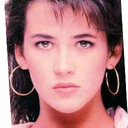

In [44]:
arrays_rescaled[608]

65


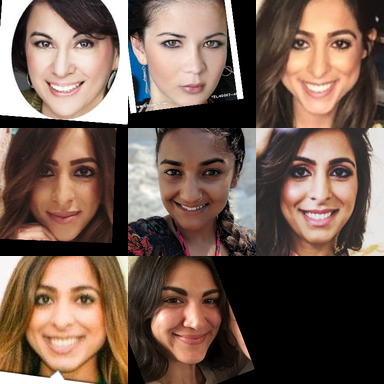

66


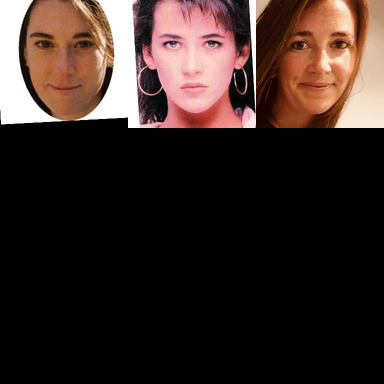

35


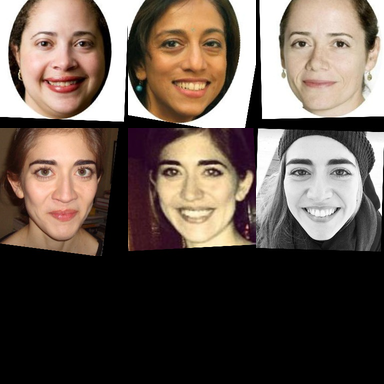

36


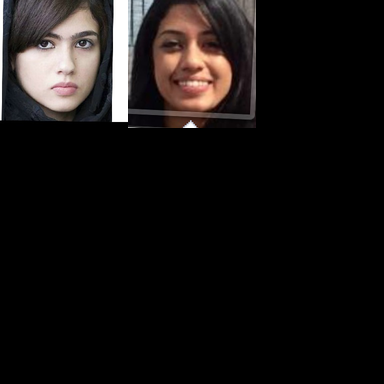

83


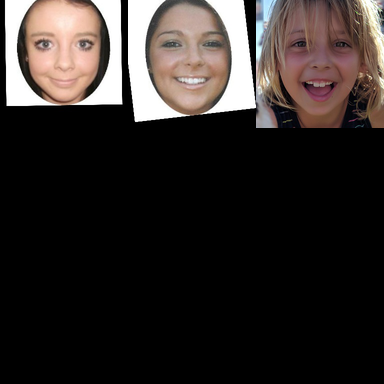

116


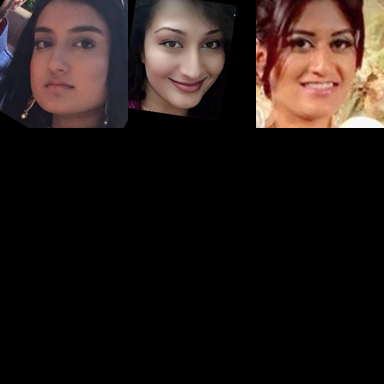

86


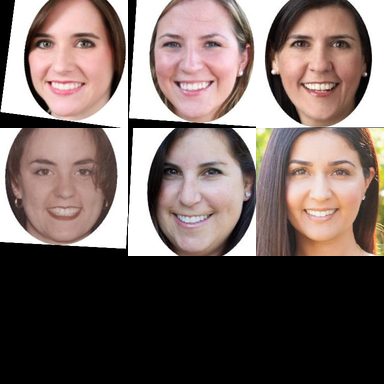

28


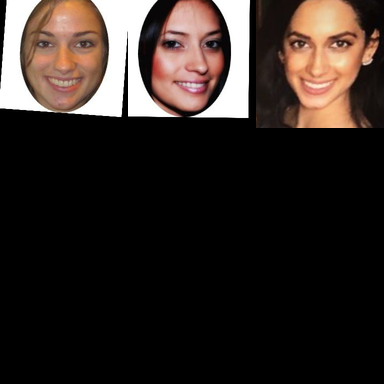

-1


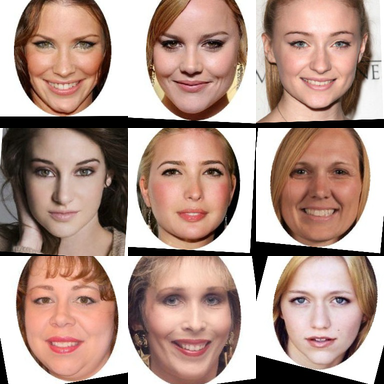

In [42]:

for cluster_idx in set(clt.labels_[-len(data_):]):
    print(cluster_idx)
    args = np.where(clt.labels_== cluster_idx)[0]
    display(
        montagify([np.array(arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(10))
    )


In [ ]:
display_cluster_montages(clt.labels_, arrays_rescaled)